# 9.9 queens on 8x8 board

In [1]:
def numWays(x0,y,isValid):
    isValid0=fillValid(x0,y,isValid)
    numTot=0
    for x in range(8):
        if isValid0[x][y+1]:
            if y==6:
                numTot+=1
            else:
                numTot+=numWays(x,y+1,isValid0)
                
    return numTot

def fillValid(x0,y,isValid):
    isValid0=[[yv for yv in xv] for xv in isValid]
    for yi in range(y+1,8):
        if yi>=0 and yi<=7:
            isValid0[x0][yi]=False
    for xi,yi in zip(range(x0-1,-1,-1),range(y+1,8)):
        if xi>=0 and yi>=0 and xi<=7 and yi<=7:
            isValid0[xi][yi]=False
    for xi,yi in zip(range(x0+1,8),range(y+1,8)):
        if xi>=0 and yi>=0 and xi<=7 and yi<=7:
            isValid0[xi][yi]=False
    return isValid0

isValid=[[True for y in range(8)] for x in range(8)]
sum([numWays(x,0,isValid) for x in range(8)])

92

# 9.10 box stacking

In [42]:
import random
boxArray=[{'len':random.randint(1,20),
           'wid':random.randint(1,20),'hei':random.randint(1,10)}
         for _ in range(8)]

In [43]:
array=[[-1 for x in range(len(boxArray))] 
       for y in range(len(boxArray))]
array[0]=[x['hei'] for x in boxArray]

In [44]:
for numBox in range(1,len(boxArray)):
    array[numBox]=[x for x in array[numBox-1]]
    for boxIndex in range(len(boxArray)):
        for stackIndex in range(len(boxArray)):
            if boxIndex!=stackIndex:
                if (boxArray[boxIndex]['len']<boxArray[stackIndex]['len'] 
                    and boxArray[boxIndex]['wid']<boxArray[stackIndex]['wid']):
                    if (array[numBox][boxIndex]<
                        array[numBox-1][stackIndex]+boxArray[boxIndex]['hei']):
                        array[numBox][boxIndex]=\
                            array[numBox-1][stackIndex]+boxArray[boxIndex]['hei']

In [45]:
array

[[1, 8, 10, 5, 6, 3, 2, 10],
 [9, 8, 10, 5, 16, 11, 10, 20],
 [12, 8, 10, 5, 17, 11, 10, 20],
 [12, 8, 10, 5, 18, 11, 10, 20],
 [12, 8, 10, 5, 18, 11, 10, 20],
 [12, 8, 10, 5, 18, 11, 10, 20],
 [12, 8, 10, 5, 18, 11, 10, 20],
 [12, 8, 10, 5, 18, 11, 10, 20]]

In [46]:
boxArray

[{'hei': 1, 'len': 5, 'wid': 11},
 {'hei': 8, 'len': 9, 'wid': 17},
 {'hei': 10, 'len': 18, 'wid': 9},
 {'hei': 5, 'len': 1, 'wid': 20},
 {'hei': 6, 'len': 2, 'wid': 8},
 {'hei': 3, 'len': 8, 'wid': 13},
 {'hei': 2, 'len': 1, 'wid': 14},
 {'hei': 10, 'len': 13, 'wid': 8}]

# 9.7 paint fill

In [79]:
array=[[0 for x in range(10)] for y in range(10)]
array[1][3]=1
array[1][4]=1
array[1][5]=1
array[1][6]=1
array[1][7]=1
array[0][8]=1
array[1][9]=1
array[2][9]=1
array[3][9]=1
array[4][9]=1
array[5][8]=1
array[6][7]=1
array[7][6]=1
array[7][5]=1
array[7][4]=1
array[6][4]=1
array[5][4]=1
array[5][3]=1
array[4][3]=1
array[3][3]=1
array[2][2]=1
for x in array:
    print x
print 'fill'
paintFill(5,5,array)
for x in array:
    print x

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fill
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [75]:
def paintFill(x,y,array):
    if array[x][y]!=1:
        array[x][y]=1
        if x-1>=0:
            if array[x-1][y]!=1:
                paintFill(x-1,y,array) 
        if x+1<len(array):
            if array[x+1][y]!=1:
                paintFill(x+1,y,array)

        if y-1>=0:
            if array[x][y-1]!=1:
                paintFill(x,y-1,array) 
        if y+1<len(array[0]):
            if array[x][y+1]!=1:
                paintFill(x,y+1,array)
                

# 9.8 coin changing 

In [107]:
coins=[1,2,5]
array=[[0 for x in range(7)] for y in range(len(coins))]
array[0]=[1 for x in range(7)]
for x in range(len(array)):
    array[x][0]=1

In [108]:
for j in range(1,len(array)):
    for i in range(1,len(array[0])):
        array[j][i]=sum([array[j-1][ij] 
                         for ij in range(i-coins[j],-coins[j],-coins[j]) if ij>=0])\
            +array[j-1][i]

In [109]:
array

[[1, 1, 1, 1, 1, 1, 1], [1, 1, 2, 2, 3, 3, 4], [1, 1, 2, 2, 3, 4, 5]]

In [89]:
[array[i][ij] 
                         for ij in range(j-coins[j],-coins[j]+1,-coins[j])]

[]

# 1.1 does string have unique chars

In [ ]:
array='skejt'
for c1 in range(len(array)):
    for c2 in range(len(array)):
        if c1!=c2:
            if array[c1]==array[c2]:

# All sets

In [135]:
def allsets(array):
    if len(array)==0:
        return [[]]
    results=allsets(array[:-1])
    newResults=results+[x+[array[-1]] for x in results]

    return newResults

In [136]:
allsets([1,2,3])

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

# Number of 2s

In [140]:
x={'1':3,'3':2}
x['2']=x.get('2',0)+1

In [141]:
x

{'1': 3, '2': 1, '3': 2}

In [142]:
from random import *
 
print randint(1, 100)

76


In [187]:
xarray=[]
for _ in range(200000):
    r1=randint(0, 4)
    r2=randint(0,4)
    if (r1*5+r2)<21:
        xarray.append((r1*5+r2)%7)


In [188]:
max(xarray)

6

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline  


(array([ 23830.,  24193.,  23950.,  23893.,  24051.,  23881.,  23966.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

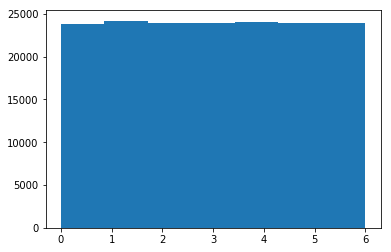

In [189]:
plt.hist(xarray,7)

In [190]:
x=True

In [195]:
x = x and False

In [196]:
x

False

# 17.14 document split

In [205]:
def check(doc,dic):
    if doc in dic:
        return 0
    if len(doc)==1:
        return 1
    sizeUnk=[]
    for i in range(1,len(doc)):
        r1=check(doc[:i],dic)
        r2=check(doc[i:],dic)
        sizeUnk.append(r1+r2)
    
    return min(sizeUnk)

In [209]:
doc='gostanford'
dic=['go','an']
check(doc,dic)

6

In [215]:
61523-61523%100000

0

# 1.4 replace char with string

In [6]:
s='123456789123456789'
c='1'
c2='000'
foundIndex=[]
for si in range(len(s)):
    if s[si]==c:
        foundIndex.append(si)
for si in foundIndex[::-1]:
    s=s[:si]+c2+s[si+1:]

In [7]:
s

'0002345678900023456789'

# 11.6 ordered matrix

In [12]:
def findM(m,k):
    i=0
    j=len(m[0])-1
    found=False
    while(found==False and i<len(m) and j>=0):
        if m[i][j]==k:
            found=True
        elif m[i][j]>k:
            j=j-1
        elif m[i][j]<k:
            i=i+1
    return found
            

In [14]:
m=[[10,20,30,40],[15,25,35,45],[27,29,37,48],[32,33,39,50]]
for mi in m:
    for mj in mi:
        print mj
        print findM(m,mj)


10
True
20
True
30
True
40
True
15
True
25
True
35
True
45
True
27
True
29
True
37
True
48
True
32
True
33
True
39
True
50
True
False


In [16]:
m=[[10,20,30,40],[15,25,35,45],[27,29,37,48],[32,33,39,50]]
for mj in [11,21,31,41,16,26,36,46,28,38,49,34,51]:
    print mj
    print findM(m,mj)


11
False
21
False
31
False
41
False
16
False
26
False
36
False
46
False
28
False
38
False
49
False
34
False
51
False


In [18]:
m=[[10,20,30,40]]
for mi in m:
    for mj in mi:
        print mj
        print findM(m,mj)
for mj in [11,21,31,41,16,26,36,46,28,38,49,34,51]:
    print mj
    print findM(m,mj)


10
True
20
True
30
True
40
True
11
False
21
False
31
False
41
False
16
False
26
False
36
False
46
False
28
False
38
False
49
False
34
False
51
False
